In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("2019_questions.csv")

### Initial Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [4]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [5]:
df.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

In [6]:
df.Tags.value_counts()

<machine-learning>                                            118
<python><pandas>                                               58
<python>                                                       55
<r>                                                            38
<tensorflow>                                                   36
                                                             ... 
<deep-learning><gradient-descent><linear-algebra><books>        1
<r><dataframe><automatic-summarization>                         1
<deep-learning><nlp><embeddings><deep-network>                  1
<clustering><random-forest><similarity>                         1
<deep-learning><predictive-modeling><image-classification>      1
Name: Tags, Length: 6462, dtype: int64

In [7]:
df.CreationDate.head()

0    2019-01-23 09:21:13
1    2019-01-23 09:34:01
2    2019-01-23 09:58:41
3    2019-01-23 10:57:09
4    2019-01-23 11:02:15
Name: CreationDate, dtype: object

### Data Cleaning

First let's change the date column to datetime64 data type

In [8]:
df.CreationDate = pd.to_datetime(df.CreationDate)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


Fill null values with 0

In [10]:
df.FavoriteCount.fillna(0, inplace=True)

In [11]:
df.isnull().sum()

Id               0
CreationDate     0
Score            0
ViewCount        0
Tags             0
AnswerCount      0
FavoriteCount    0
dtype: int64

Let's clean up the tags column so that:

```
<machine-learning><regression><linear-regression><regularization>
```

    is

```
"machine-learning,regression,linear-regression,regularization"
```

In [12]:
df.Tags = df.Tags.str.replace("<", "").str.replace(">", ",")

In [13]:
df.Tags.head()

0                        machine-learning,data-mining,
1    machine-learning,regression,linear-regression,...
2             python,time-series,forecast,forecasting,
3                   machine-learning,scikit-learn,pca,
4                 dataset,bigdata,data,speech-to-text,
Name: Tags, dtype: object

### Count Views and Answers

Rows with multiple tags need to be converted to single tags.

So with a tag:

```
<keras><python>  view_count = 24
```

```
<keras> view_count = 24
<python> view_count = 24
```

In [14]:
# Count views
count_views = {}

for index, row in df.iterrows():
    tags = row['Tags'].split(',')
    for tag in tags:
        if (tag in count_views):
            count_views[tag] += row['ViewCount']
        else:
            count_views[tag] = row['ViewCount']
            
count_views.pop('', None)

1516313

In [15]:
# Used_count
used_counts = {}

for index, row in df.iterrows():
    tags = row['Tags'].split(',')
    for tag in tags:
        if (tag in used_counts):
            used_counts[tag] += 1
        else:
            used_counts[tag] = 1
            
used_counts.pop('', None)

8839

In [16]:
views = pd.DataFrame.from_dict(count_views, orient='index')
views.reset_index(inplace = True)
views.columns = ['tags', 'views']

views.sort_values(by='views', ascending=False).head(20)

,tags,views
5,python,537585
0,machine-learning,388499
22,keras,268608
21,deep-learning,233628
31,pandas,201787
39,neural-network,185367
9,scikit-learn,128110
45,tensorflow,121369
57,classification,104457
86,dataframe,89352


In [17]:
used = pd.DataFrame.from_dict(used_counts, orient='index')
used.reset_index(inplace = True)
used.columns = ['tags', 'used']

used.sort_values(by='used', ascending=False).head(20)

,tags,used
0,machine-learning,2693
5,python,1814
21,deep-learning,1220
39,neural-network,1055
22,keras,935
57,classification,685
45,tensorflow,584
9,scikit-learn,540
26,nlp,493
23,cnn,489


In [18]:
most_used = used.sort_values(by='used', ascending=False).head(20)
most_viewed = views.sort_values(by='views', ascending=False).head(20)

In [19]:
in_used = pd.merge(most_used, most_viewed, how="left", on='tags')
in_used

,tags,used,views
0,machine-learning,2693,388499.0
1,python,1814,537585.0
2,deep-learning,1220,233628.0
3,neural-network,1055,185367.0
4,keras,935,268608.0
5,classification,685,104457.0
6,tensorflow,584,121369.0
7,scikit-learn,540,128110.0
8,nlp,493,71382.0
9,cnn,489,70349.0


In [20]:
in_viewed = pd.merge(most_used, most_viewed, how="right", on='tags')
in_viewed

,tags,used,views
0,machine-learning,2693.0,388499
1,python,1814.0,537585
2,deep-learning,1220.0,233628
3,neural-network,1055.0,185367
4,keras,935.0,268608
5,classification,685.0,104457
6,tensorflow,584.0,121369
7,scikit-learn,540.0,128110
8,nlp,493.0,71382
9,cnn,489.0,70349


### Is Deep Learning a Fad?

In [21]:
dl = pd.read_csv("all_questions.csv")

In [22]:
dl.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [23]:
# Cleaning
dl.CreationDate = pd.to_datetime(dl.CreationDate)
dl.Tags = dl.Tags.str.replace("<", "").str.replace(">", ",")

In [24]:
dl['month_date'] = dl['CreationDate'] + pd.offsets.MonthBegin(1)
dl['month_date'] = dl.month_date.dt.date

In [25]:
dl.isnull().sum()

Id              0
CreationDate    0
Tags            0
month_date      0
dtype: int64

In [34]:
# Count views
dl_views_time = {}


for index, row in dl.iterrows():
    tags = row['Tags'].split(',')
    for tag in tags:
        if tag == 'deep-learning':
            date = row['month_date'] #.strftime('%Y-%m-%d')
            
            if (date in dl_views_time):
                dl_views_time[date] += 1
            else:
                dl_views_time[date] =1
            
dl_views_time.pop('', None)

In [35]:
dl_views_time

{datetime.date(2019, 3, 1): 89,
 datetime.date(2018, 9, 1): 94,
 datetime.date(2019, 8, 1): 161,
 datetime.date(2017, 12, 1): 50,
 datetime.date(2016, 11, 1): 12,
 datetime.date(2016, 12, 1): 16,
 datetime.date(2014, 7, 1): 1,
 datetime.date(2018, 10, 1): 81,
 datetime.date(2018, 1, 1): 68,
 datetime.date(2014, 8, 1): 1,
 datetime.date(2017, 1, 1): 19,
 datetime.date(2019, 4, 1): 109,
 datetime.date(2014, 11, 1): 1,
 datetime.date(2017, 2, 1): 33,
 datetime.date(2019, 9, 1): 110,
 datetime.date(2014, 12, 1): 1,
 datetime.date(2015, 1, 1): 4,
 datetime.date(2018, 2, 1): 73,
 datetime.date(2017, 3, 1): 29,
 datetime.date(2018, 11, 1): 64,
 datetime.date(2015, 3, 1): 1,
 datetime.date(2015, 4, 1): 2,
 datetime.date(2017, 4, 1): 32,
 datetime.date(2015, 5, 1): 1,
 datetime.date(2015, 6, 1): 3,
 datetime.date(2018, 3, 1): 78,
 datetime.date(2019, 5, 1): 106,
 datetime.date(2015, 7, 1): 3,
 datetime.date(2017, 5, 1): 12,
 datetime.date(2019, 10, 1): 81,
 datetime.date(2018, 12, 1): 57,
 date

In [36]:
dl_time = pd.DataFrame.from_dict(dl_views_time, orient='index')
dl_time.reset_index(inplace=True)
dl_time.columns = ['date', 'views']

In [37]:
dl_time.head()

,date,views
0,2019-03-01,89
1,2018-09-01,94
2,2019-08-01,161
3,2017-12-01,50
4,2016-11-01,12


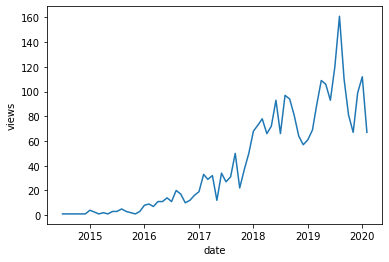

In [38]:
sns.lineplot(data=dl_time, x='date', y='views')